# Do More Politically Informed People Identify as Liberal?

## Kevin Zhang

Data Science

2/14/2017

#### Documentation/Reference/Works Cited

Data Source:
http://www.europeansocialsurvey.org/

Data Documentation, Variables, Legend:
http://www.europeansocialsurvey.org/downloadwizard/

Reference to some of the methods used:
https://github.com/AllenDowney/ProbablyOverthinkingIt/blob/master/ess.py

## About this Notebook

This notebook is the source code for the data science report done on whether more informed people were more likely to be liberal than less informed people. The basis for the idea is that since America's liberals view the vast majority of conservatives as uneducated or ignorant of the facts, i.e. "if only they knew what was really going on", they would believe in more progressive and liberal policies if they were more informed, such as debates regarding global warming or abortions etc. Personally identifying as liberal, I was curious as to whether this belief was true for other countries, not just the US.

The code below outlines my methodology for gathering, cleaning, and analyzing the data. Basically, I found a dataset from the European Social Survey, and discovered data on the amount of time the population spends watching politics or current affairs on TV, the most viewed medium for information distribution in Europe. I then broke the population into four sections based on time spent watching politics on TV, and compared these different sections to each other for various politically controversial topics. 

The main concepts used for comparison were CDFs, PMFs and means, which were deemed accurate enough for the purposes of this project. The Cohen Effect Size was also used as a more quantitative measurement of statistical significance and differences between groups.

The overall result is that there doesn't seem to be much of a correlation between the amount of time spent getting informed on politics and the opinions that people have on certain policies. This is reasonable as it would suggest that just because a person watches a lot of politics on TV doesn't mean that they're watching a politically neutral channel or that it changes their inner perceptions of various policies. Perhaps political opinions are shaped by more personal beliefs or maybe more external communities, rather than just by how informed a person is.

Rather, there was some potential insight into the idea that being more informed might just make people more polarized in their political standing instead of just being more liberal. The lrscale CDF graph speaks most to that idea.

For a full breakdown of the code, feel free to continue reading.

In [2]:
%matplotlib inline

import thinkstats2, thinkplot
import pandas as pd
import numpy as np

In [3]:
def clean_dataframe(df):
    """
    Takes the entire Pandas dataframe and cleans out all bad responses associated with the data that I am specifically
    looking to by replacing them with NaNs. Can then use dropna() to fully clean out data later.
    
    Input: Pandas dataframe
    Output: dataframe that has been cleaned out with NaNs
    """
    df.tvpol.replace([66, 77, 88, 99], np.nan, inplace=True)
    df.rdpol.replace([66, 77, 88, 99], np.nan, inplace=True)
    df.nwsppol.replace([66, 77, 88, 99], np.nan, inplace=True)
    df.polintr.replace([7, 8, 9], np.nan, inplace=True)
    df.lrscale.replace([77, 88, 99], np.nan, inplace=True)
    df.happy.replace([77, 88, 99], np.nan, inplace=True)
    df.gincdif.replace([7, 8, 9], np.nan, inplace=True)
    df.freehms.replace([7, 8, 9], np.nan, inplace=True)
    df.imdfetn.replace([7, 8, 9], np.nan, inplace=True)
    df.scnsenv.replace([7, 8, 9], np.nan, inplace=True)
    df.prtyban.replace([7, 8, 9], np.nan, inplace=True)
    df.hinctnta.replace([77, 88, 99], np.nan, inplace=True)
    return df


In [4]:
def make_and_plot_pmf(series, label):
    """
    Takes a category and makes a pmf. Then also plots the pmf using hist.
    
    Input: Category string
    Output: pmf plot
    """
    series_pmf = thinkstats2.Pmf(series, label=label)
    thinkplot.Hist(series_pmf)
    thinkplot.Config(xlabel=label, ylabel="pmf", loc="upper right")


In [5]:
def make_and_plot_cdf(sections, category, label):
    """
    Takes a category and makes a cdf on the 4 different sections. Then plots and returns the cdfs.
    
    Input: 4 sections, category, label
    Output: cdf plot of the category separated into the 4 sections
    """
    cdfList = []
    secnames = ["very_little","moderate","high","very_high"]
    counter = 0
    for section in sections:
        cdfList.append(thinkstats2.Cdf(section[category], label=secnames[counter]))
        counter += 1
    thinkplot.PrePlot(4)
    thinkplot.Cdfs(cdfList)
    thinkplot.Config(xlabel=label, ylabel="cdf", loc="lower right")

In [6]:
def mean_comparison(sections, category):
    """
    Takes a category and finds the means for each of the 4 sections based on that category.
    
    Input: 4 sections, category
    Output: mean of the category separated into the 4 sections
    """
        
    secnames = ["very_little-","moderate----","high--------","very_high---"]
    counter = 0
    print "under", category
    for section in sections:
        print secnames[counter], section[category].mean()
        counter += 1

In [7]:
def cohen_effect_size(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [8]:
#This reads in and cleans up the dataset for ESS5, the dataset collected by the European Social Survey in 2010.
#Note that this dataset is used because it's the most recent dataset that contains the most holistic set of data.

#For more information on what each of the variables stand for or how they are evaluated, take a look at the 
#Documentation link above

ess5 = pd.read_stata('../../ESS5e03_3.dta',convert_categoricals=False,convert_missing=False)
ess5 = clean_dataframe(ess5)


In [9]:
#These lines break down the distribution of tvpol into four different sections (all quantities based on a daily unit): 
#very_little = 0 - 0.5 hours
#moderate = 0.5 - 1.5 hours
#high = 1.5 - 2.5 hours
#very_high = 2.5+ hours
#It then stores these four sections into a list called sections, to be used throughout this codebase

very_little = ess5[ess5.tvpol<=1]
moderate = ess5[ess5.tvpol.isin([2,3])]
high = ess5[ess5.tvpol.isin([4,5])]
very_high = ess5[ess5.tvpol>5]
sections = [very_little, moderate, high, very_high]

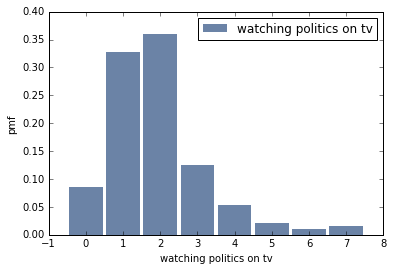

In [10]:
#A general visualization of the entire surveyed population under tvpol, or time spent watching tv for politics or 
#current affairs

tvpol = ess5['tvpol'].dropna()
make_and_plot_pmf(tvpol, 'watching politics on tv')


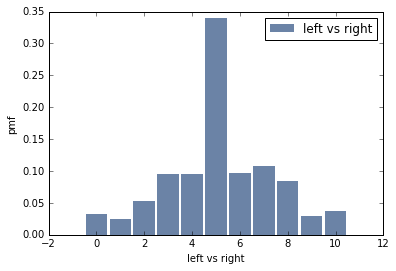

In [11]:
#A general visualzation of the entire surveyed population under lrscale, or where on the political spectrum does each
#respondent identify, from left to right

series = ess5['lrscale'].dropna()
make_and_plot_pmf(series, 'left vs right')


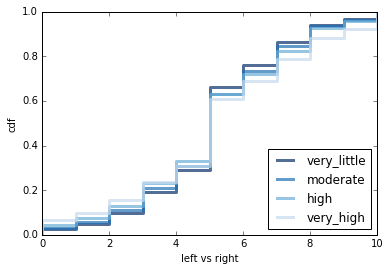

In [12]:
#This plots the CDF of the four sections under lrscale
#Note that for this category, there's not really a trend, as the cdfs flip in rank once they pass the moderate point
#It appears that correlation seems to favor that the higher the informed, the more likely they are to spread out from
#the moderate position and develop more polarizing views

make_and_plot_cdf(sections, 'lrscale', 'left vs right')    

In [13]:
#The means confirm the above idea that little correlation exists.

mean_comparison(sections, 'lrscale')

under lrscale
very_little- 5.15566815213
moderate---- 5.1735021735
high-------- 5.12765957447
very_high--- 5.23688811189


In [14]:
# the Cohen Effect Size is not very significant, showing that level of information doesn't mean a whole lot towards
#whether a person is more liberal

cohen_effect_size(sections[0].lrscale, sections[3].lrscale)

-0.03807707780241041

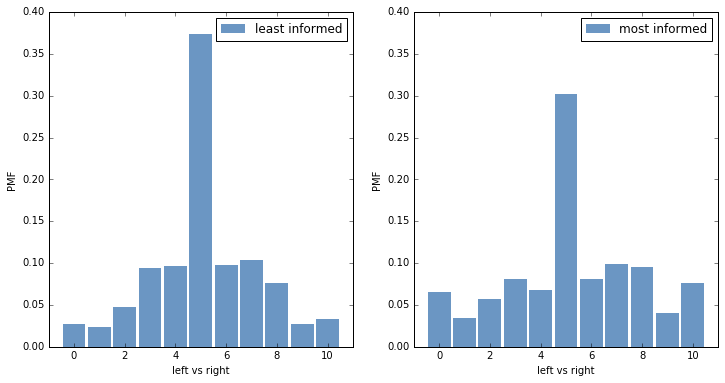

In [54]:
# Proving the point about more informed people being more polarized, the following two graphs show that the Pmf 
# distribution of the most informed and least informed, respectively. Notice that while both are centered heavily about
# the mean of 5, the most informed pmf graph is more evenly distributed, as the ends have higher probabilities than 
# those of the least informed group.

# This would suggest that the most informed group has more people trending towards the polar ends of the political
# spectrum than the least informed group, meaning that they are more polarized as a group.
# make_and_plot_pmf(sections[3].lrscale, 'most informed ')
pmf1 = thinkstats2.Pmf(sections[0].lrscale, "least informed")
pmf2 = thinkstats2.Pmf(sections[3].lrscale, "most informed")
pmfs = [pmf1, pmf2]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf1)
thinkplot.Config(xlabel='left vs right', ylabel='PMF', xlim=[-1, 11])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Hist(pmf2)
thinkplot.Config(xlabel='left vs right', ylabel="PMF", xlim=[-1, 11], ylim=[0, .4])

In [50]:
#The standard deviations also prove the above idea, as the higher informed people have a higher spread out distribution
#than the lower informed people

sections[0].lrscale.std(), sections[1].lrscale.std(), sections[2].lrscale.std(), sections[3].lrscale.std()

(2.0973709662842541,
 2.2101570571373443,
 2.3528400755780194,
 2.6314610643237533)

### All code below this was used to better understand the data and the population as a whole, and while may have been considered was ultimately not used in the report

In [ ]:
#A general visualzation of the entire surveyed population under polintr, or the respondent's political interest level
series = ess5['polintr'].dropna()
make_and_plot_pmf(series, 'political interest')

In [ ]:
#This plots the CDF of the four sections under polintr
#Note that for this category, there's a pretty big trend, where
#the very informed seem to have a large interest in politics, and the least informed seem to have little
#interest.

make_and_plot_cdf(sections, 'polintr', 'political interest')    

In [ ]:
#The means confirm the above idea.

mean_comparison(sections, 'polintr')

In [ ]:
# the Cohen Effect Size is pretty big for this one, showing a fairly large difference in political interest from
#different levels of information

cohen_effect_size(sections[0].polintr, sections[3].polintr)

In [ ]:
#A general visualzation of the entire surveyed population under happy, or how happy each respondent is

series = ess5['happy'].dropna()
make_and_plot_pmf(series, 'how happy')

In [ ]:
#This plots the CDF of the four sections under happy
#Note that for this category, there's a noticeable trend, where
#the very informed seem to be less happy, and the least informed seem to be more happy

make_and_plot_cdf(sections, 'happy', 'happiness')    


In [ ]:
#The means confirm the above idea.

mean_comparison(sections, 'happy')

In [ ]:
# the Cohen Effect Size is not super significant, but there is definitely a difference between the two.

cohen_effect_size(sections[0].happy, sections[3].happy)

In [ ]:
#A general visualzation of the entire surveyed population under hinctnta, or the total household income of each
#respondent

series = ess5['hinctnta'].dropna()
make_and_plot_pmf(series, 'total household income')

In [ ]:
#This plots the CDF of the four sections under hinctnta
#Note that for this category, there's a noticeable trend, where
#the very informed seem to occupy the lower deciles, and the least informed seem to occupy the higher deciles

make_and_plot_cdf(sections, 'hinctnta', 'household income')    

In [ ]:
#The means confirm the above idea.

mean_comparison(sections, 'hinctnta')

In [ ]:
# the Cohen Effect Size is decently significant, not the biggest, but not small enough that its effect can't be ignored

cohen_effect_size(sections[0].hinctnta, sections[3].hinctnta)

In [ ]:
#A general visualzation of the entire surveyed population under gincdif, or how much a respondent agrees with the idea
#that the government should reduce income inequality

series = ess5['gincdif'].dropna()
make_and_plot_pmf(series, 'gov should reduce income inequality')

In [ ]:
#This plots the CDF of the four sections under gincdif
#Note that for this category, there's a small trend, as it seems that the more informed are more likely to agree

make_and_plot_cdf(sections, 'gincdif', 'gov should reduce income inequality')    

In [ ]:
#The means confirm the above idea.

mean_comparison(sections, 'gincdif')

In [ ]:
# the Cohen Effect Size is pretty small, so this is not a super relevant correlation, but a difference does exist
cohen_effect_size(sections[0].gincdif, sections[3].gincdif)

In [ ]:
#A general visualzation of the entire surveyed population under freehms, or how much a respondent agrees with the idea
#that gays and lesbians should be allowed to live their lives however they wish

series = ess5['freehms'].dropna()
make_and_plot_pmf(series, 'gay and lesbians free')

In [ ]:
#This plots the CDF of the four sections under freehms
#Note that for this category, there's a trend, but interestingly enough it's in the other direction, where
#the more informed disagree with freedom for homosexuals, and the less informed agree more

make_and_plot_cdf(sections, 'freehms', 'gays and lesbians free')  

In [ ]:
#The means confirm the above idea.

mean_comparison(sections, 'freehms')

In [ ]:
# the Cohen Effect Size is again not really significant, but one could make the argument that it does exist to a degree

cohen_effect_size(sections[0].freehms, sections[3].freehms)

In [ ]:
#A general visualzation of the entire surveyed population under imdfetn, or how much a respondent agrees with the idea
#that immigrants of a different race than them should be allowed to live in their country

series = ess5['imdfetn'].dropna()
make_and_plot_pmf(series, 'allow immigrants of diff race')

In [ ]:
#This plots the CDF of the four sections under imdfetn
#Note that for this category, there's not much of a trend, as the rankings of the four sections seem to
#interchange between the answers, perhaps with the more informed even disagreeing slightly more

make_and_plot_cdf(sections, 'imdfetn', 'allow immigrants of different races')

In [ ]:
#The means confirm the above idea.

mean_comparison(sections, 'imdfetn')

In [ ]:
# the Cohen Effect Size is shows that there's not much difference between low informed and high informed on this matter

cohen_effect_size(sections[0].imdfetn, sections[3].imdfetn)

In [ ]:
#A general visualzation of the entire surveyed population under scnsenv, or how much a respondent agrees with the idea
#that science can solve environmental problems

series = ess5['scnsenv'].dropna()
make_and_plot_pmf(series, 'science can solve environmental probs')

In [ ]:
#This plots the CDF of the four sections under scnsenv
#Note that for this category, there's a trend apparent, where the more informed seem to agree more with environmental
#policies and the less informed seeming to agree less

make_and_plot_cdf(sections, 'scnsenv', 'science can solve environmental probs')  

In [ ]:
#The means confirm the above idea.

mean_comparison(sections, 'scnsenv')

In [ ]:
# the Cohen Effect Size is not super significant, but once again as the others above there does seem to exist a small
#correlation that means a small difference between the more informed and the less informed

cohen_effect_size(sections[0].scnsenv, sections[3].scnsenv)

In [ ]:
#A general visualzation of the entire surveyed population under prtyban, or how much a respondent agrees with the idea
#that parties that wish to overthrow democracy should be banned

series = ess5['prtyban'].dropna()
make_and_plot_pmf(series, 'ban parties that overthrow democracy')

In [ ]:
#This plots the CDF of the four sections under prtyban
#Note that for this category, there's not much of a trend, as it seems that all the sections have varying opinions
#on this idea

make_and_plot_cdf(sections, 'prtyban', 'ban parties who overthrow democracy')  

In [ ]:
#The means confirm the above idea.

mean_comparison(sections, 'prtyban')

In [ ]:
# the Cohen Effect Size basically says there's no significance.

cohen_effect_size(sections[0].prtyban, sections[3].prtyban)